In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn   # Алгоритмы машинного обучения
import warnings
warnings.filterwarnings('ignore')

# Прогнозирование CHD заболевания
Ранний прогноз сердечно-сосудистых заболеваний может помочь в принятии решений об изменении образа жизни у пациентов с высоким риском и, в свою очередь, уменьшить количество осложнений. Это исследование направлено на выявление заболевания по набору факторов риска.

Загружаем данные:

In [2]:
data_raw = pd.read_csv("Downloads/framingham_heart_disease.csv")

Пропущенные значения:

In [3]:
data_raw.describe(include = 'all')

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
data_raw.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)
data_raw.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Нормализация:

In [6]:
data_stand = (data_raw - data_raw.mean(axis = 0))/data_raw.std(axis = 0)
data_stand.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03,4.238000e+03
mean,2.543715e-16,1.132490e-16,3.885339e-16,-1.383456e-16,-1.692579e-16,-7.560022e-16,7.396946e-16,-2.357194e-16,-1.518331e-15,-8.369898e-17,-4.479041e-16,2.798844e-16,3.155884e-15,-2.261444e-16,2.508088e-16,-3.832863e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-8.670560e-01,-2.051402e+00,-9.725849e-01,-9.881542e-01,-7.512336e-01,-1.735911e-01,-7.702346e-02,-6.710217e-01,-1.624574e-01,-2.925716e+00,-2.216725e+00,-2.929553e+00,-2.520290e+00,-2.650996e+00,-1.819512e+00,-4.232555e-01
25%,-8.670560e-01,-8.848348e-01,-9.725849e-01,-9.881542e-01,-7.512336e-01,-1.735911e-01,-7.702346e-02,-6.710217e-01,-1.624574e-01,-6.923361e-01,-6.966303e-01,-6.627121e-01,-6.681842e-01,-6.551847e-01,-4.200080e-01,-4.232555e-01
50%,-8.670560e-01,-6.823785e-02,2.038422e-02,-9.881542e-01,-7.512336e-01,-1.735911e-01,-7.702346e-02,-6.710217e-01,-1.624574e-01,-6.067296e-02,-1.974947e-01,-7.501261e-02,-9.830539e-02,-7.307301e-02,-1.576010e-01,-4.232555e-01
75%,1.153056e+00,7.483591e-01,1.013353e+00,1.011749e+00,9.291000e-01,-1.735911e-01,-7.702346e-02,1.489913e+00,-1.624574e-01,5.709901e-01,5.285208e-01,5.861493e-01,5.495633e-01,5.921974e-01,1.485404e-01,-4.232555e-01
max,1.153056e+00,2.381553e+00,2.006322e+00,1.011749e+00,5.129934e+00,5.759305e+00,1.297999e+01,1.489913e+00,6.154006e+00,1.036177e+01,7.380292e+00,5.004390e+00,7.614709e+00,5.581726e+00,1.366250e+01,2.362081e+00


Разобьем данные на обучающую и тестовую выборки в пропорции:

In [12]:
X = data_stand.drop(['TenYearCHD', 'education'], axis=1)
y = data_raw['TenYearCHD']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(3178, 1060)

# Несбалансированность классов

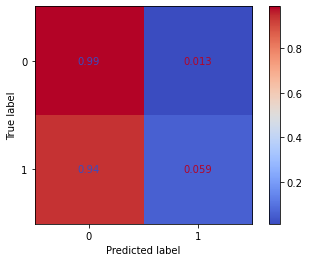

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)

y_test_predict = knn.predict(X_test)

error_results = dict()
error_results["NeuralNetwork"] = [0.135]

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, normalize='true', cmap='coolwarm')
pass

Классификатор хорошо предсказывает отсутствие сердечно-сосудистого заболевания. Вероятность корректного предсказания наличия сердечно-сосудистого заболевания мала. Следовательно, присутствует несбалансированность.

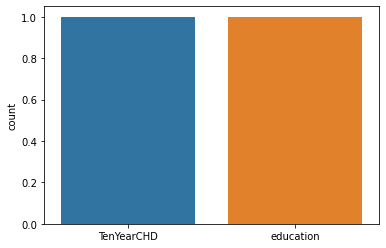

In [14]:
sns.countplot(x=['TenYearCHD', 'education'], data = y)
pass

In [16]:
from imblearn.over_sampling import SMOTE
X_train_balanc, Y_train_balanc = SMOTE().fit_resample(X_train, y_train)
X_train_balanc = pd.DataFrame(X_train_balanc)
Y_train_balanc = pd.DataFrame(Y_train_balanc)

0.38018867924528305


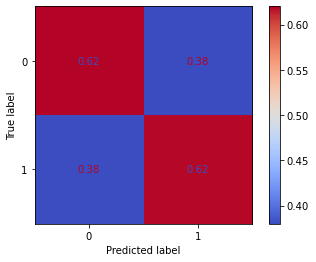

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train_balanc, Y_train_balanc.values.ravel())
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, normalize='true', cmap='coolwarm')

y_test_pred = knn.predict(X_test)
print(np.mean(y_test != y_test_pred))

pass

Из графика видно, что повысилась точность предсказания наличия сердечно-сосудистого заболевания, однако точность предсказания отсутсвия сердечно-сосудистого заболевания понизилась.

# Классификатор Decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

n_max_depth = np.arange(1, 100, 2)
test_err = []
train_err = []
for n in n_max_depth:
    rf = DecisionTreeClassifier(max_depth = n, random_state = 0)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

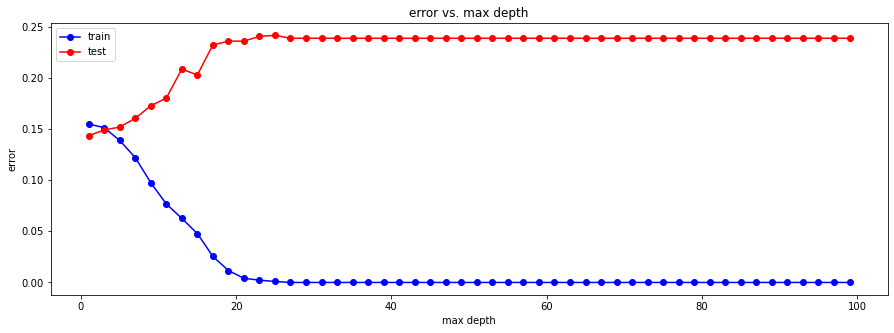

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(n_max_depth, train_err, 'b-o', label = 'train')
plt.plot(n_max_depth, test_err, 'r-o', label = 'test')
plt.title('error vs. max depth')
plt.xlabel('max depth')
plt.ylabel('error')
plt.legend()

pass

In [22]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)
n_max_depth_opt = n_max_depth[test_err == min_test_err]
print(n_max_depth_opt)
rf = DecisionTreeClassifier(max_depth = n_max_depth_opt[0], random_state = 0)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

error_results["DecisionTreeClassifier"] = [np.mean(y_test != y_test_pred)]

0.0 0.14339622641509434
[1]
0.15481434864694776
0.14339622641509434


# Классификатор Random Forest

In [26]:
from sklearn import ensemble

n_estimators = np.arange(10, 500, 10)
test_err = []
train_err = []
for n in n_estimators:
    rf = ensemble.RandomForestClassifier(n_estimators = n, random_state = 0, oob_score=True)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

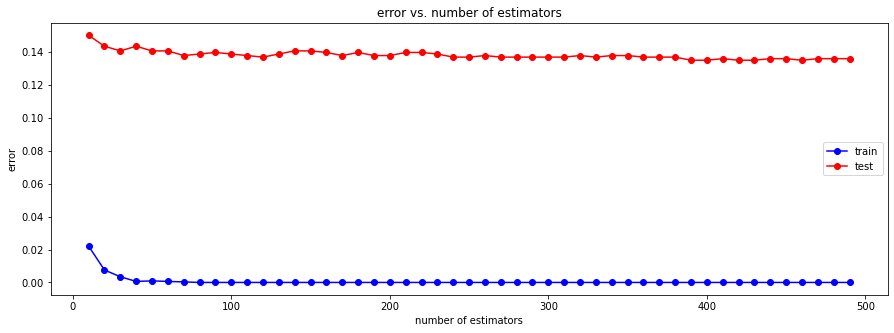

In [27]:
plt.figure(figsize=(15, 5))
plt.plot(n_estimators, train_err, 'b-o', label = 'train')
plt.plot(n_estimators, test_err, 'r-o', label = 'test')
plt.title('error vs. number of estimators')
plt.xlabel('number of estimators')
plt.ylabel('error')
plt.legend()

pass

In [28]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)
n_estimators_opt = n_estimators[test_err == min_test_err]
print(n_estimators_opt)
rf = ensemble.RandomForestClassifier(n_estimators = n_estimators_opt[0], random_state = 0)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

error_results["RandomForestClassifier"] = [np.mean(y_test != y_test_pred)]

0.0 0.1349056603773585
[390 400 420 430 460]
0.0
0.1349056603773585


# Классификатор Extremely Randomized Trees

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

n_estimators = np.arange(10, 500, 10)
test_err = []
train_err = []
for n in n_estimators:
    rf = ensemble.ExtraTreesClassifier(n_estimators = n, random_state = 0)
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

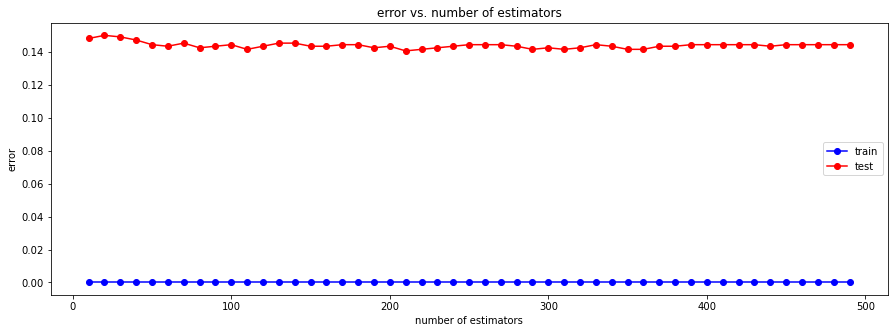

In [30]:
plt.figure(figsize=(15, 5))
plt.plot(n_estimators, train_err, 'b-o', label = 'train')
plt.plot(n_estimators, test_err, 'r-o', label = 'test')
plt.title('error vs. number of estimators')
plt.xlabel('number of estimators')
plt.ylabel('error')
plt.legend()

pass

In [31]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)
n_estimators_opt = n_estimators[test_err == min_test_err]
print(n_estimators_opt)
rf = ensemble.ExtraTreesClassifier(n_estimators = n_estimators_opt[0], random_state = 0)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

error_results["ExtraTreesClassifier"] = [np.mean(y_test != y_test_pred)]

0.0 0.14056603773584905
[210]
0.0
0.14056603773584905


# Общие выводы

In [32]:
for k, val in error_results.items():
    print(k, val[0])

NeuralNetwork 0.135
DecisionTreeClassifier 0.14339622641509434
RandomForestClassifier 0.1349056603773585
ExtraTreesClassifier 0.14056603773584905


По результатам, наименьшая ошибка получается при использовании нейронной сети и классификатора RandomForest.